# Classification with Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import sklearn as skl

## Game of Thrones Dataset

In this section, we will use the dataset based on popular book series (and HBO TV series) from George RR Martin, Game of Thrones. The dataset was made available through [Kaggle](https://www.kaggle.com/mylesoneill/game-of-thrones/data) which has information on the character deaths. The dataset was cleaned and we will be working with a sample dataset for this analysis. 

Game of Thrones is known for abruptly ending its characters. We will use machine learning methods to predict if a character will be alive or dead. 

In [3]:
got_data = pd.read_csv("./data/GoT_Character_Deaths.csv")
print(got_data.shape)
got_data.head()

(905, 11)


,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,dead
0,Addam Marbrand,Lannister,56,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),None,49,1,1,0,0,1,0,0,1
2,Aegon Targaryen,Targaryen,5,1,1,0,0,0,0,1,0
3,Adrack Humble,Greyjoy,20,1,1,0,0,0,0,1,1
4,Aemon Targaryen (son of Maekar I),Night's Watch,21,1,1,1,0,1,1,0,1


Note that the data also includes the 'Name' of the person and the 'Allegiances'. We will remove 'Name' as the name itself is not indicative if the character will alive or dead. We will also remove 'Allegiances' **for now as we do not know how to handle categorical datatype**. In the next class we will handle categorical datatype.  

In [4]:
got_data.drop(['Name', 'Allegiances'], axis = 1, inplace=True)
got_data.head()

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,dead
0,56,1,1,1,1,1,1,0,0
1,49,1,1,0,0,1,0,0,1
2,5,1,1,0,0,0,0,1,0
3,20,1,1,0,0,0,0,1,1
4,21,1,1,1,0,1,1,0,1


## Classfication using Logistic Regression

In [5]:
## Split the input features and outcome variable

got_data_X = got_data.drop('dead',1)
got_data_Y = got_data['dead']

In [6]:
got_data_X.head()

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,56,1,1,1,1,1,1,0
1,49,1,1,0,0,1,0,0
2,5,1,1,0,0,0,0,1
3,20,1,1,0,0,0,0,1
4,21,1,1,1,0,1,1,0


### `train_test_split()`: Method to split the data into train and test

We usually split the data into training set to learn a classifier and then a test set to validate how good our model is 

Important parameters to this method

* **random_state**: Seed to used by randomizer to randomly split the data
* **train_size**: Use float to specify what fraction to use for training. 

In [7]:
from sklearn.model_selection import train_test_split

got_train_X, got_test_X, got_train_Y, got_test_Y = train_test_split(got_data_X, got_data_Y, random_state=42, train_size = 0.7)

In [8]:
print(len(got_data_X), len(got_train_X), len(got_test_X))

905 633 272


### Learn a classifier: Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

log_regression_model = LogisticRegression()

log_regression_model.fit(got_train_X, got_train_Y)

LogisticRegression()

### Predict on test data

In [10]:
got_predict_Y = log_regression_model.predict(got_test_X)

In [11]:
import sklearn.metrics as sklmetrics

sklmetrics.accuracy_score(got_test_Y, got_predict_Y)

0.7169117647058824

### Confusion Matrix and plotting it

In [12]:
conf_mat = sklmetrics.confusion_matrix(got_test_Y, got_predict_Y, labels =[0,1])
conf_mat

array([[160,  24],
       [ 53,  35]], dtype=int64)

Text(91.68, 0.5, 'True Value')

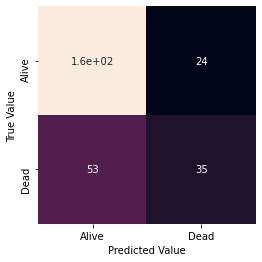

In [13]:
sns.heatmap(conf_mat, square=True, annot=True, cbar = False, xticklabels = ['Alive','Dead'], yticklabels = ['Alive','Dead'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

### Understanding the feature importance of the Logistic Regression

In [14]:
# Defining a function to plot coefficients as feature importance
# INPUT: Used for Logistic Regression Classifier
#        Feature Names
# OUTPUT: A plot of top most Coefficients
def plot_feature_importance_coeff(model, Xnames, cls_nm = None):

    imp_features = pd.DataFrame(np.column_stack((Xnames, model.coef_.ravel())), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    # Sort the features based on absolute value of importance
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])
    
    # Plot the feature importances of the forest
    plt.figure()
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout() 
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

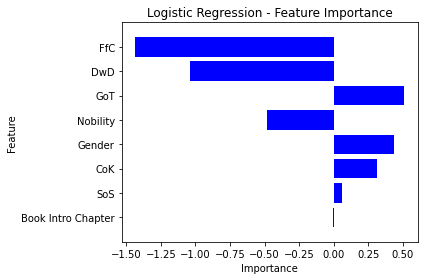

In [15]:
plot_feature_importance_coeff(log_regression_model, got_data_X.columns, cls_nm="Logistic Regression")

## Classification using Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier()

dec_tree_model.fit(got_train_X, got_train_Y)

DecisionTreeClassifier()

0.6911764705882353
[[149  35]
 [ 49  39]]


Text(91.68, 0.5, 'True Value')

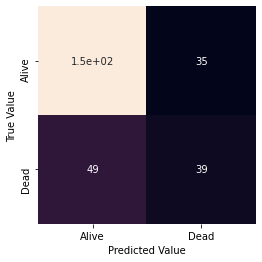

In [17]:
got_predict_Y = dec_tree_model.predict(got_test_X)

print(sklmetrics.accuracy_score(got_test_Y, got_predict_Y))

conf_mat = sklmetrics.confusion_matrix(got_test_Y, got_predict_Y, labels =[0,1])
print(conf_mat)

sns.heatmap(conf_mat, square=True, annot=True, cbar = False, xticklabels = ['Alive','Dead'], yticklabels = ['Alive','Dead'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

### Understanding the feature importance of the Decision Tree

In [18]:
# Defining a function to plot feature importance for trees
# INPUT: Used for Tree based Classifier
#        Feature Names
# OUTPUT: A plot of top most features

def plot_feature_importance(model, Xnames, cls_nm = None):

    # Measuring important features
    imp_features = pd.DataFrame(np.column_stack((Xnames, model.feature_importances_)), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    # Sort the features based on absolute value of importance
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])
    
    # Plot the feature importances of the forest
    plt.figure()
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout() 
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

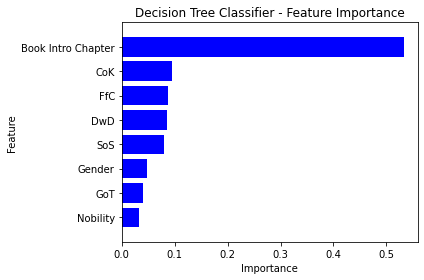

In [19]:
plot_feature_importance(dec_tree_model, got_data_X.columns, cls_nm='Decision Tree Classifier')

## Activity

We will be using the dataset available from [UCI data repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#), that provides information on the phone campaign run by the bank to see if a customer can be converted to have term deposit at their bank. We will only be using a sample from the data. 

In [20]:

bank_data = pd.read_csv('./data/bank_campaign_small.csv')
bank_data.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,success
0,30,married,primary,0,1787,0,0,cellular,79,1,-1,0,0
1,33,married,secondary,0,4789,1,1,cellular,220,1,339,4,0
2,35,single,tertiary,0,1350,1,0,cellular,185,1,330,1,0
3,30,married,tertiary,0,1476,1,1,unknown,199,4,-1,0,0
4,59,married,secondary,0,0,1,0,unknown,226,1,-1,0,0


In [21]:
bank_data.dtypes

age           int64
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
success       int64
dtype: object

### Activity: Data Preprocessing Step - Remove categorical input variables

Note that there are some categorical (the data type is object) and the classifiers do not like that datatype. So, we will remove it for now. Later, we will learn how to handle categorical input variables. 

In [22]:
bank_data.drop(['marital', 'education', 'contact'], axis = 1, inplace=True)
bank_data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,success
0,30,0,1787,0,0,79,1,-1,0,0
1,33,0,4789,1,1,220,1,339,4,0
2,35,0,1350,1,0,185,1,330,1,0
3,30,0,1476,1,1,199,4,-1,0,0
4,59,0,0,1,0,226,1,-1,0,0


## Activity: Classification using Logistic Regression and Decision Trees

Follow these steps
1. Seperate X (input features) and Y (outcome)
2. Split into training data and test data. Use 70% of data for training
    * Verify if the data is appropriately split by checking the number of rows in each of the training and test data. 
3. Learn the following two classifiers to predict success or failure
    * Logistic Regression
    * Decision Tree 
4. Predict using the test data for both the classifiers
5. Provide accuracy score as well as plot the confusion matrix
    * Think about the consequence of False Positives and False Negatives
6. Provide the variable importance for each classifier
    * Use `plot_feature_importance_coeff` for Logistic Regression
    * Use `plot_feature_importance` for Decision Tree

In [23]:
bank_data_X = bank_data.drop(['success'], axis = 1)
bank_data_Y = bank_data['success']

In [24]:
bank_train_X, bank_test_X, bank_train_Y, bank_test_Y = train_test_split(bank_data_X, bank_data_Y, 
                                                                        random_state=42, train_size = 0.7)

In [25]:
bank_logistic_model = LogisticRegression()
bank_logistic_model.fit(bank_train_X, bank_train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
bank_predict_Y = bank_logistic_model.predict(bank_test_X)
sklmetrics.accuracy_score(bank_test_Y, bank_predict_Y)

0.8857774502579219

[[1168   37]
 [ 118   34]]


Text(91.68, 0.5, 'True Value')

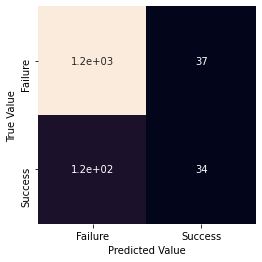

In [27]:
conf_mat = sklmetrics.confusion_matrix(bank_test_Y, bank_predict_Y, labels =[0,1])
print(conf_mat)

sns.heatmap(conf_mat, square=True, annot=True, cbar = False, xticklabels = ['Failure','Success'], 
            yticklabels = ['Failure','Success'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

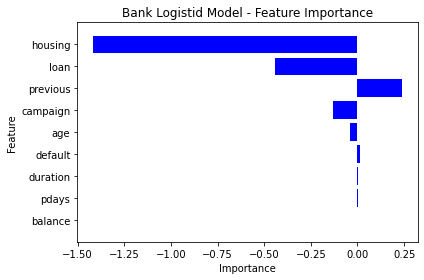

In [28]:
plot_feature_importance_coeff(bank_logistic_model, bank_data_X.columns, cls_nm="Bank Logistid Model")

In [33]:
bank_decision_model = DecisionTreeClassifier(random_state=42)

bank_decision_model.fit(bank_train_X, bank_train_Y)

DecisionTreeClassifier(random_state=42)

In [34]:
bank_predict_Y = bank_decision_model.predict(bank_test_X)
sklmetrics.accuracy_score(bank_test_Y, bank_predict_Y)

0.840825350036846

[[1077  128]
 [  88   64]]


Text(91.68, 0.5, 'True Value')

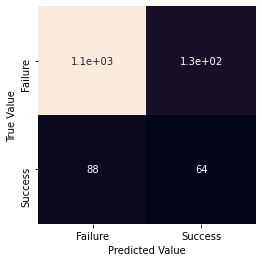

In [35]:
conf_mat = sklmetrics.confusion_matrix(bank_test_Y, bank_predict_Y, labels =[0,1])
print(conf_mat)

sns.heatmap(conf_mat, square=True, annot=True, cbar = False, xticklabels = ['Failure','Success'], 
            yticklabels = ['Failure','Success'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

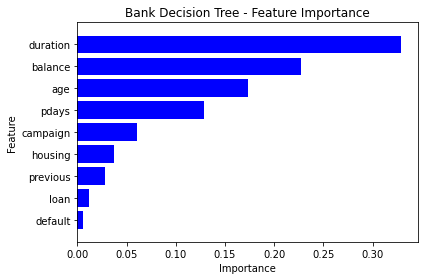

In [32]:
plot_feature_importance(bank_decision_model, bank_data_X.columns, cls_nm="Bank Decision Tree")